# 3.1 - Más Modelos

In [1]:
import pandas as pd

from sklearn.datasets import load_diabetes, load_wine
from sklearn.model_selection import train_test_split as tts

In [2]:
diabetes=pd.DataFrame(load_diabetes().data, columns=load_diabetes().feature_names)
diabetes['target']=load_diabetes().target

diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [7]:
wine=pd.DataFrame(load_wine().data, columns=load_wine().feature_names)
wine['target']=load_wine().target

wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [9]:
X_train_d, X_test_d, y_train_d, y_test_d = tts(diabetes.drop('target', axis=1), diabetes.target)

In [11]:
X_train_v, X_test_v, y_train_v, y_test_v = tts(wine.drop('target', axis=1), wine.target) 

# Gradiente Descendente Estocástico SGD

![grad1](images/grad1.png)

![grad2](images/grad2.jpg)

Es una derivación numérica. Lo estocástico viene de la elección de la muestra, en vez de coger todos los datos solo coge uno. Reduce el costo computacional. Sirve como regresor o como clasificador.

##### SGDR

In [12]:
from sklearn.linear_model import SGDRegressor as SGDR

In [15]:
sgdr=SGDR(max_iter=10000)

sgdr.fit(X_train_d, y_train_d)

train_score=sgdr.score(X_train_d, y_train_d)
test_score=sgdr.score(X_test_d, y_test_d)

'train R2: ', train_score, '---  test R2: ', test_score

('train R2: ', 0.522121351492968, '---  test R2: ', 0.4627405326439876)

In [16]:
#help(sgdr)

##### SGDC

In [17]:
from sklearn.linear_model import SGDClassifier as SGDC

In [18]:
sgdc=SGDC(max_iter=10000)

sgdc.fit(X_train_v, y_train_v)

train_score=sgdc.score(X_train_v, y_train_v)
test_score=sgdc.score(X_test_v, y_test_v)

'train Acc: ', train_score, '---  test Acc: ', test_score

('train Acc: ', 0.6466165413533834, '---  test Acc: ', 0.6444444444444445)

In [21]:
#help(sgdc)

# Naive Bayes

$$P(clase|data)= \frac{P(data|clase)·P(clase)}{P(data)}$$

+ P(data|clase) es $N(\mu, \sigma)$ (datos normalizados)

+ P(clase) es el a priori 

+ P(data) no se calcula

+ P(clase|data) el a posteriori, lo que se busca

Lo de Naive viene de la suposición de independencia condicional entre predictores, lo cuál no suele ser verdad.


$$\hat{y}=argmax [P(y) \prod_{i=1}^{n} P(x_i|y)]$$

### GNB (Gaussian Naive Bayes)

In [23]:
from sklearn.naive_bayes import GaussianNB as GNB

gnb=GNB()

gnb.fit(X_train_v, y_train_v)

train_score=gnb.score(X_train_v, y_train_v)
test_score=gnb.score(X_test_v, y_test_v)

'train Acc: ', train_score, '---  test Acc: ', test_score

('train Acc: ', 0.9849624060150376, '---  test Acc: ', 0.9777777777777777)

In [26]:
#help(gnb)

### MNB (Multinomial Naive Bayes)

In [27]:
from sklearn.naive_bayes import MultinomialNB as MNB

mnb=MNB()

mnb.fit(X_train_v, y_train_v)

train_score=mnb.score(X_train_v, y_train_v)
test_score=mnb.score(X_test_v, y_test_v)

'train Acc: ', train_score, '---  test Acc: ', test_score

('train Acc: ', 0.8195488721804511, '---  test Acc: ', 0.8444444444444444)

In [29]:
#help(mnb)

### CNB (Complement Naive Bayes)

In [30]:
from sklearn.naive_bayes import ComplementNB as CNB

cnb=CNB()

cnb.fit(X_train_v, y_train_v)

train_score=cnb.score(X_train_v, y_train_v)
test_score=cnb.score(X_test_v, y_test_v)

'train Acc: ', train_score, '---  test Acc: ', test_score

('train Acc: ', 0.6466165413533834, '---  test Acc: ', 0.6444444444444445)

In [32]:
#help(cnb)

### BNB (Bernoulli Naive Bayes)

In [41]:
from sklearn.naive_bayes import BernoulliNB as BNB

bnb=BNB(binarize=3)

bnb.fit(X_train_v, y_train_v)

train_score=bnb.score(X_train_v, y_train_v)
test_score=bnb.score(X_test_v, y_test_v)

'train Acc: ', train_score, '---  test Acc: ', test_score

('train Acc: ', 0.7142857142857143, '---  test Acc: ', 0.7777777777777778)

In [42]:
#help(bnb)

# K-Nearest Neighbors

![knn](images/knn.png)

Este modelo se basa en al idea de vecindario, según sea lo que rodea al nuevo dato, así se clasificará.

Básicamente se trata de calcular las distancias (euclídea o L1 normalmente) entre los datos, para asignar el valor (etiqueta) al nuevo dato según sean sus vecinos.

Se suele tomar $k$ como un número impar para poder tomar una decisión en caso de empate.

#### KNNR

In [44]:
from sklearn.neighbors import KNeighborsRegressor as KNNR

In [53]:
knnr=KNNR(n_neighbors=7)

knnr.fit(X_train_d, y_train_d)

train_score=knnr.score(X_train_d, y_train_d)
test_score=knnr.score(X_test_d, y_test_d)

'train R2: ', train_score, '---  test R2: ', test_score

('train R2: ', 0.5665457815200896, '---  test R2: ', 0.3813489906290005)

In [48]:
#help(knnr)

#### KNNC

In [49]:
from sklearn.neighbors import KNeighborsClassifier as KNNC

In [63]:
knnc=KNNC(n_neighbors=13)

knnc.fit(X_train_v, y_train_v)

train_score=knnc.score(X_train_v, y_train_v)
test_score=knnc.score(X_test_v, y_test_v)

'train Acc: ', train_score, '---  test Acc: ', test_score

('train Acc: ', 0.7368421052631579, '---  test Acc: ', 0.7333333333333333)

In [65]:
#help(knnc)

# Ensemble Models


### Bagging  -  Boosting


![boost](images/boost.png)

#### Gradient Boost Regressor

In [66]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [75]:
gbr=GBR(n_estimators=100, learning_rate=0.01)

gbr.fit(X_train_d, y_train_d)

train_score=gbr.score(X_train_d, y_train_d)
test_score=gbr.score(X_test_d, y_test_d)

'train R2: ', train_score, '---  test R2: ', test_score

('train R2: ', 0.5101388684161872, '---  test R2: ', 0.38309652195505894)

In [76]:
#help(gbr)

#### Gradient Boost Classifier

In [77]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [87]:
gbc=GBC(n_estimators=100, learning_rate=0.1, max_depth=3)

gbc.fit(X_train_v, y_train_v)

train_score=gbc.score(X_train_v, y_train_v)
test_score=gbc.score(X_test_v, y_test_v)

'train Acc: ', train_score, '---  test Acc: ', test_score

('train Acc: ', 1.0, '---  test Acc: ', 0.9777777777777777)

In [90]:
#help(gbc)

## Extreme Gradient Boosting

In [91]:
!pip install xgboost

#### XGBR

In [93]:
from xgboost import XGBRegressor as XGBR

xgbr=XGBR()

xgbr.fit(X_train_d, y_train_d)

train_score=xgbr.score(X_train_d, y_train_d)
test_score=xgbr.score(X_test_d, y_test_d)

'train R2: ', train_score, '---  test R2: ', test_score

('train R2: ', 0.9999990877857416, '---  test R2: ', 0.2589502655325473)

In [95]:
#help(xgbr)

#### XGBC

In [105]:
from xgboost import XGBClassifier as XGBC

xgbc=XGBC(use_label_encoder=False, n_estimators=10)

xgbc.fit(X_train_v, y_train_v)

train_score=xgbc.score(X_train_v, y_train_v)
test_score=xgbc.score(X_test_v, y_test_v)

'train Acc: ', train_score, '---  test Acc: ', test_score

[19:52:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


('train Acc: ', 1.0, '---  test Acc: ', 0.9777777777777777)

In [99]:
#help(xgbc)

### Catboost

##### CTR

In [107]:
#!pip install catboost

In [110]:
from catboost import CatBoostRegressor as CTR

ctr=CTR(verbose=0)

ctr.fit(X_train_d, y_train_d)

train_score=ctr.score(X_train_d, y_train_d)
test_score=ctr.score(X_test_d, y_test_d)

'train R2: ', train_score, '---  test R2: ', test_score

('train R2: ', 0.989052191899944, '---  test R2: ', 0.3946709951126549)

In [111]:
ctr  # sus hiperparametros en https://catboost.ai/

##### CTC

In [122]:
from catboost import CatBoostClassifier as CTC

ctc=CTC(verbose=0)

ctc.fit(X_train_v, y_train_v)

train_score=ctc.score(X_train_v, y_train_v)
test_score=ctc.score(X_test_v, y_test_v)

'train Acc: ', train_score, '---  test Acc: ', test_score

('train Acc: ', 1.0, '---  test Acc: ', 1.0)

## LightGBM

In [123]:
!pip install lightgbm

#### LGBR

In [126]:
from lightgbm import LGBMRegressor as LGBMR

lgbmr=LGBMR(n_estimators=1000)

lgbmr.fit(X_train_d, y_train_d)

train_score=lgbmr.score(X_train_d, y_train_d)
test_score=lgbmr.score(X_test_d, y_test_d)

'train R2: ', train_score, '---  test R2: ', test_score

('train R2: ', 0.9999857151936259, '---  test R2: ', 0.31378388462040396)

In [127]:
#help(lgbmr)

#### LGBC

In [130]:
from lightgbm import LGBMClassifier as LGBMC

lgbmc=LGBMC()

lgbmc.fit(X_train_v, y_train_v)

train_score=lgbmc.score(X_train_v, y_train_v)
test_score=lgbmc.score(X_test_v, y_test_v)

'train Acc: ', train_score, '---  test Acc: ', test_score

('train Acc: ', 1.0, '---  test Acc: ', 0.9777777777777777)

In [132]:
#help(lgbmc)

# PyCaret

https://pycaret.org/tutorial/

https://colab.research.google.com/drive/1GqQ3XAIzg4krBbnOpKyeRqT0qBQhdwYL#scrollTo=lUvE187JEQm3

In [138]:
#!pip install pycaret

In [139]:
from pycaret.datasets import get_data

dataset=get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [140]:
dataset.shape

(24000, 24)

In [141]:
data=dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)

data_test=dataset.drop(data.index).reset_index(drop=True)

data.shape, data_test.shape

((22800, 24), (1200, 24))

In [142]:
from pycaret.classification import *

In [143]:
credito=setup(data=data, target='default', session_id=123)

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [144]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8254,0.0000,0.3637,0.6913,0.4764,0.3836,0.4122,0.0240
lda,Linear Discriminant Analysis,0.8247,0.7634,0.3755,0.6794,0.4835,0.3884,0.4132,0.1030
gbc,Gradient Boosting Classifier,0.8226,0.7789,0.3551,0.6806,0.4664,0.3725,0.4010,1.1760
ada,Ada Boost Classifier,0.8221,0.7697,0.3505,0.6811,0.4626,0.3690,0.3983,0.2820
catboost,CatBoost Classifier,0.8216,0.7768,0.3637,0.6694,0.4711,0.3750,0.4004,1.6000
lightgbm,Light Gradient Boosting Machine,0.8210,0.7750,0.3609,0.6679,0.4683,0.3721,0.3977,0.7740
rf,Random Forest Classifier,0.8199,0.7598,0.3663,0.6601,0.4707,0.3727,0.3965,0.4830
xgboost,Extreme Gradient Boosting,0.8160,0.7561,0.3629,0.6391,0.4626,0.3617,0.3829,2.0640
et,Extra Trees Classifier,0.8092,0.7377,0.3677,0.6047,0.4571,0.3497,0.3657,0.3660
lr,Logistic Regression,0.7814,0.6410,0.0003,0.1000,0.0006,0.0003,0.0034,0.4040


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)

In [148]:
dt=create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7343,0.6257,0.4327,0.4005,0.4160,0.2444,0.2447
1,0.7325,0.6277,0.4384,0.3984,0.4175,0.2443,0.2448
2,0.7431,0.6282,0.4241,0.4146,0.4193,0.2544,0.2544
3,0.7274,0.6151,0.4155,0.3856,0.4000,0.2240,0.2242
4,0.7187,0.6054,0.4040,0.3691,0.3858,0.2038,0.2042
5,0.7187,0.6014,0.3897,0.3656,0.3773,0.1958,0.1960
6,0.7206,0.6128,0.4212,0.3760,0.3973,0.2162,0.2168
7,0.7331,0.5986,0.3610,0.3830,0.3717,0.2024,0.2026
8,0.7206,0.6045,0.3983,0.3707,0.3840,0.2036,0.2038
9,0.7442,0.6272,0.4195,0.4148,0.4171,0.2533,0.2533


In [146]:
knn=create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7469,0.6020,0.1920,0.3545,0.2491,0.1128,0.1204
1,0.7550,0.5894,0.2092,0.3883,0.2719,0.1402,0.1500
2,0.7506,0.5883,0.1576,0.3459,0.2165,0.0923,0.1024
3,0.7419,0.5818,0.1519,0.3136,0.2046,0.0723,0.0790
4,0.7563,0.5908,0.1490,0.3611,0.2110,0.0954,0.1085
5,0.7550,0.5997,0.1748,0.3720,0.2378,0.1139,0.1255
6,0.7638,0.5890,0.1891,0.4125,0.2593,0.1413,0.1565
7,0.7613,0.6240,0.1633,0.3904,0.2303,0.1163,0.1318
8,0.7619,0.5988,0.1862,0.4037,0.2549,0.1356,0.1500
9,0.7549,0.5756,0.1897,0.3771,0.2524,0.1246,0.1351


In [147]:
rf=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8133,0.7673,0.3610,0.6269,0.4582,0.3551,0.3749
1,0.8239,0.7615,0.3782,0.6735,0.4844,0.3882,0.4117
2,0.8258,0.7708,0.3467,0.7076,0.4654,0.3756,0.4098
3,0.8177,0.7605,0.3725,0.6436,0.4719,0.3710,0.3913
4,0.8208,0.7642,0.3725,0.6599,0.4762,0.3780,0.4006
5,0.8283,0.7638,0.3954,0.6866,0.5018,0.4070,0.4297
6,0.8127,0.7647,0.3582,0.6250,0.4554,0.3522,0.3721
7,0.8283,0.7390,0.3553,0.7168,0.4751,0.3861,0.4202
8,0.8108,0.7496,0.3610,0.6146,0.4549,0.3496,0.3678
9,0.8176,0.7565,0.3621,0.6462,0.4641,0.3645,0.3867


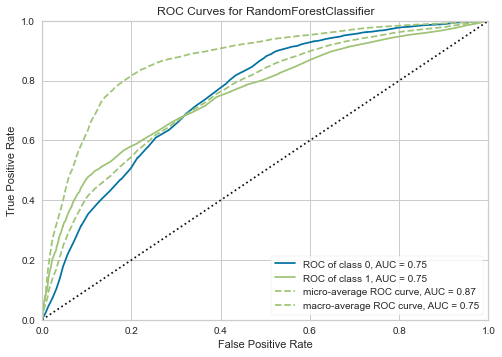

In [149]:
plot_model(rf, plot='auc')

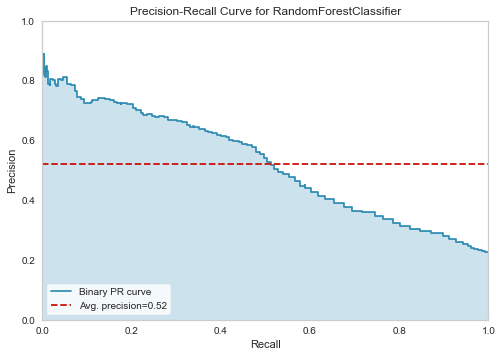

In [150]:
plot_model(rf, plot='pr')

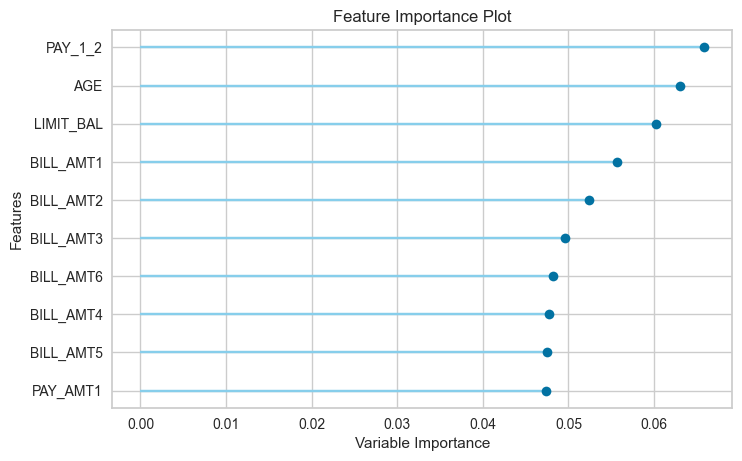

In [151]:
plot_model(rf, plot='feature')

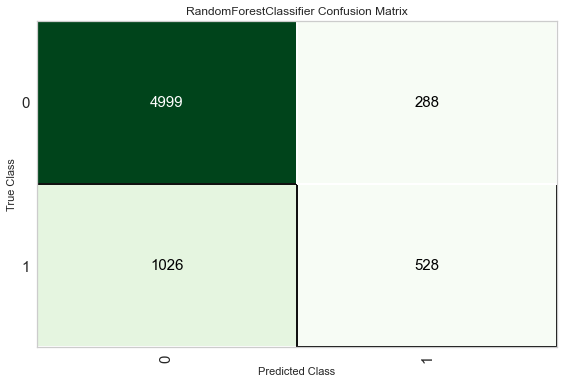

In [152]:
plot_model(rf, plot='confusion_matrix')

In [153]:
predict_model(rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8079,0.7546,0.3398,0.6471,0.4456,0.3428,0.3688


In [154]:
final_rf=finalize_model(rf)

print(final_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [155]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9999,1.0000,1.0000,0.9994,0.9997,0.9996,0.9996


# H2o


https://www.h2o.ai/

In [ ]:
#!pip install h2o

In [133]:
import h2o
from h2o.automl import H2OAutoML

In [134]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 hours 31 mins
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_iudh_j00pc8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.149 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [135]:
url='https://s3.amazonaws.com/erin-data/higgs/'


# parsear datos a h2o
train=h2o.import_file(url + 'higgs_train_10k.csv')
test=h2o.import_file(url + 'higgs_test_5k.csv')


X=train.columns
y='response'
X.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [136]:
# factor para clasificacion binaria

train[y]=train[y].asfactor()
test[y]=test[y].asfactor()

In [137]:
# 20 modelos

aml=H2OAutoML(max_models=20, seed=1)
aml.train(x=X, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_7_AutoML_2_20220210_202420

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.09034418885060849
RMSE: 0.30057310067703746
LogLoss: 0.32607312270395944
Null degrees of freedom: 9999
Residual degrees of freedom: 9984
Null deviance: 13828.11338742424
Residual deviance: 6521.462454079188
AIC: 6553.462454079188
AUC: 0.9780323506124821
AUCPR: 0.9803257617487638
Gini: 0.9560647012249641

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4972399622291153: 


,,0,1,Error,Rate
0,0,4239.0,466.0,0.099,(466.0/4705.0)
1,1,324.0,4971.0,0.0612,(324.0/5295.0)
2,Total,4563.0,5437.0,0.079,(790.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.497240,0.926388,208.0
1,max f2,0.408243,0.952102,241.0
2,max f0point5,0.596481,0.936914,172.0
3,max accuracy,0.497240,0.921000,208.0
4,max precision,0.991928,1.000000,0.0
5,max recall,0.187224,1.000000,332.0
6,max specificity,0.991928,1.000000,0.0
7,max absolute_mcc,0.497240,0.841524,208.0
8,max min_per_class_accuracy,0.520693,0.919169,198.0
9,max mean_per_class_accuracy,0.509053,0.919944,203.0



Gains/Lift Table: Avg response rate: 52,95 %, avg score: 52,91 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.958176,1.888574,1.888574,1.000,0.969691,1.000000,0.969691,0.018886,0.018886,88.857413,88.857413,0.018886
1,2,0.02,0.946235,1.888574,1.888574,1.000,0.952197,1.000000,0.960944,0.018886,0.037771,88.857413,88.857413,0.037771
2,3,0.03,0.937957,1.888574,1.888574,1.000,0.941863,1.000000,0.954584,0.018886,0.056657,88.857413,88.857413,0.056657
3,4,0.04,0.929524,1.888574,1.888574,1.000,0.933093,1.000000,0.949211,0.018886,0.075543,88.857413,88.857413,0.075543
4,5,0.05,0.922274,1.888574,1.888574,1.000,0.925827,1.000000,0.944534,0.018886,0.094429,88.857413,88.857413,0.094429
5,6,0.10,0.889719,1.888574,1.888574,1.000,0.905291,1.000000,0.924913,0.094429,0.188857,88.857413,88.857413,0.188857
6,7,0.15,0.857167,1.884797,1.887315,0.998,0.873518,0.999333,0.907781,0.094240,0.283097,88.479698,88.731508,0.282885
7,8,0.20,0.826963,1.884797,1.886686,0.998,0.842574,0.999000,0.891479,0.094240,0.377337,88.479698,88.668555,0.376912
8,9,0.30,0.753757,1.862134,1.878502,0.986,0.791257,0.994667,0.858072,0.186213,0.563551,86.213409,87.850173,0.560150
9,10,0.40,0.668784,1.786591,1.855524,0.946,0.713001,0.982500,0.821804,0.178659,0.742210,78.659112,85.552408,0.727332




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.18615005886608546
RMSE: 0.43145110831481875
LogLoss: 0.5494744641047378
Null degrees of freedom: 9999
Residual degrees of freedom: 9985
Null deviance: 13828.573591958839
Residual deviance: 10989.489282094755
AIC: 11019.489282094755
AUC: 0.7904489528047133
AUCPR: 0.80878900259985
Gini: 0.5808979056094266

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3792196025011093: 


,,0,1,Error,Rate
0,0,2359.0,2346.0,0.4986,(2346.0/4705.0)
1,1,701.0,4594.0,0.1324,(701.0/5295.0)
2,Total,3060.0,6940.0,0.3047,(3047.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.379220,0.750960,258.0
1,max f2,0.192743,0.860711,342.0
2,max f0point5,0.637585,0.738639,140.0
3,max accuracy,0.527480,0.716200,189.0
4,max precision,0.980555,1.000000,0.0
5,max recall,0.059917,1.000000,388.0
6,max specificity,0.980555,1.000000,0.0
7,max absolute_mcc,0.527480,0.431870,189.0
8,max min_per_class_accuracy,0.527480,0.715392,189.0
9,max mean_per_class_accuracy,0.527480,0.716251,189.0



Gains/Lift Table: Avg response rate: 52,95 %, avg score: 52,95 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.938479,1.869688,1.869688,0.990,0.953006,0.990000,0.953006,0.018697,0.018697,86.968839,86.968839,0.018484
1,2,0.02,0.922993,1.831917,1.850803,0.970,0.930962,0.980000,0.941984,0.018319,0.037016,83.191690,85.080264,0.036166
2,3,0.03,0.912504,1.813031,1.838212,0.960,0.917777,0.973333,0.933915,0.018130,0.055146,81.303116,83.821215,0.053446
3,4,0.04,0.902788,1.794145,1.827195,0.950,0.908193,0.967500,0.927485,0.017941,0.073088,79.414542,82.719547,0.070325
4,5,0.05,0.895469,1.737488,1.809254,0.920,0.899010,0.958000,0.921790,0.017375,0.090463,73.748820,80.925401,0.085999
5,6,0.10,0.851868,1.677054,1.743154,0.888,0.873233,0.923000,0.897511,0.083853,0.174315,67.705382,74.315392,0.157950
6,7,0.15,0.812723,1.627951,1.704753,0.862,0.832237,0.902667,0.875753,0.081398,0.255713,62.795090,70.475291,0.224682
7,8,0.20,0.775019,1.537299,1.662890,0.814,0.793908,0.880500,0.855292,0.076865,0.332578,53.729934,66.288952,0.281781
8,9,0.30,0.695973,1.406988,1.577589,0.745,0.735168,0.835333,0.815251,0.140699,0.473277,40.698772,57.758892,0.368282
9,10,0.40,0.617476,1.201133,1.483475,0.636,0.656792,0.785500,0.775636,0.120113,0.593390,20.113314,48.347498,0.411031


In [158]:
lb=aml.leaderboard

lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_7_AutoML_2_20220210_202420,0.790449,0.549474,0.808789,0.315504,0.431451,0.18615
StackedEnsemble_AllModels_4_AutoML_2_20220210_202420,0.790355,0.548939,0.80846,0.320972,0.431447,0.186146
StackedEnsemble_AllModels_3_AutoML_2_20220210_202420,0.789773,0.549623,0.808142,0.308214,0.431757,0.186414
StackedEnsemble_BestOfFamily_4_AutoML_2_20220210_202420,0.788147,0.551141,0.805933,0.326477,0.43247,0.187031
StackedEnsemble_AllModels_2_AutoML_2_20220210_202420,0.788065,0.55118,0.807113,0.330304,0.432578,0.187124
StackedEnsemble_BestOfFamily_5_AutoML_2_20220210_202420,0.788043,0.551296,0.805639,0.313636,0.43253,0.187082
StackedEnsemble_AllModels_1_AutoML_2_20220210_202420,0.787767,0.551507,0.806597,0.330411,0.432689,0.187219
StackedEnsemble_BestOfFamily_8_AutoML_2_20220210_202420,0.787702,0.551769,0.8054,0.31874,0.432672,0.187205
StackedEnsemble_BestOfFamily_2_AutoML_2_20220210_202420,0.785913,0.553552,0.804034,0.336185,0.433563,0.187977
StackedEnsemble_BestOfFamily_3_AutoML_2_20220210_202420,0.785331,0.553844,0.804006,0.324573,0.433821,0.188201


In [159]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_7_AutoML_2_20220210_202420

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.09034418885060849
RMSE: 0.30057310067703746
LogLoss: 0.32607312270395944
Null degrees of freedom: 9999
Residual degrees of freedom: 9984
Null deviance: 13828.11338742424
Residual deviance: 6521.462454079188
AIC: 6553.462454079188
AUC: 0.9780323506124821
AUCPR: 0.9803257617487638
Gini: 0.9560647012249641

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4972399622291153: 


,,0,1,Error,Rate
0,0,4239.0,466.0,0.099,(466.0/4705.0)
1,1,324.0,4971.0,0.0612,(324.0/5295.0)
2,Total,4563.0,5437.0,0.079,(790.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.497240,0.926388,208.0
1,max f2,0.408243,0.952102,241.0
2,max f0point5,0.596481,0.936914,172.0
3,max accuracy,0.497240,0.921000,208.0
4,max precision,0.991928,1.000000,0.0
5,max recall,0.187224,1.000000,332.0
6,max specificity,0.991928,1.000000,0.0
7,max absolute_mcc,0.497240,0.841524,208.0
8,max min_per_class_accuracy,0.520693,0.919169,198.0
9,max mean_per_class_accuracy,0.509053,0.919944,203.0



Gains/Lift Table: Avg response rate: 52,95 %, avg score: 52,91 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.958176,1.888574,1.888574,1.000,0.969691,1.000000,0.969691,0.018886,0.018886,88.857413,88.857413,0.018886
1,2,0.02,0.946235,1.888574,1.888574,1.000,0.952197,1.000000,0.960944,0.018886,0.037771,88.857413,88.857413,0.037771
2,3,0.03,0.937957,1.888574,1.888574,1.000,0.941863,1.000000,0.954584,0.018886,0.056657,88.857413,88.857413,0.056657
3,4,0.04,0.929524,1.888574,1.888574,1.000,0.933093,1.000000,0.949211,0.018886,0.075543,88.857413,88.857413,0.075543
4,5,0.05,0.922274,1.888574,1.888574,1.000,0.925827,1.000000,0.944534,0.018886,0.094429,88.857413,88.857413,0.094429
5,6,0.10,0.889719,1.888574,1.888574,1.000,0.905291,1.000000,0.924913,0.094429,0.188857,88.857413,88.857413,0.188857
6,7,0.15,0.857167,1.884797,1.887315,0.998,0.873518,0.999333,0.907781,0.094240,0.283097,88.479698,88.731508,0.282885
7,8,0.20,0.826963,1.884797,1.886686,0.998,0.842574,0.999000,0.891479,0.094240,0.377337,88.479698,88.668555,0.376912
8,9,0.30,0.753757,1.862134,1.878502,0.986,0.791257,0.994667,0.858072,0.186213,0.563551,86.213409,87.850173,0.560150
9,10,0.40,0.668784,1.786591,1.855524,0.946,0.713001,0.982500,0.821804,0.178659,0.742210,78.659112,85.552408,0.727332




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.18615005886608546
RMSE: 0.43145110831481875
LogLoss: 0.5494744641047378
Null degrees of freedom: 9999
Residual degrees of freedom: 9985
Null deviance: 13828.573591958839
Residual deviance: 10989.489282094755
AIC: 11019.489282094755
AUC: 0.7904489528047133
AUCPR: 0.80878900259985
Gini: 0.5808979056094266

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3792196025011093: 


,,0,1,Error,Rate
0,0,2359.0,2346.0,0.4986,(2346.0/4705.0)
1,1,701.0,4594.0,0.1324,(701.0/5295.0)
2,Total,3060.0,6940.0,0.3047,(3047.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.379220,0.750960,258.0
1,max f2,0.192743,0.860711,342.0
2,max f0point5,0.637585,0.738639,140.0
3,max accuracy,0.527480,0.716200,189.0
4,max precision,0.980555,1.000000,0.0
5,max recall,0.059917,1.000000,388.0
6,max specificity,0.980555,1.000000,0.0
7,max absolute_mcc,0.527480,0.431870,189.0
8,max min_per_class_accuracy,0.527480,0.715392,189.0
9,max mean_per_class_accuracy,0.527480,0.716251,189.0



Gains/Lift Table: Avg response rate: 52,95 %, avg score: 52,95 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.938479,1.869688,1.869688,0.990,0.953006,0.990000,0.953006,0.018697,0.018697,86.968839,86.968839,0.018484
1,2,0.02,0.922993,1.831917,1.850803,0.970,0.930962,0.980000,0.941984,0.018319,0.037016,83.191690,85.080264,0.036166
2,3,0.03,0.912504,1.813031,1.838212,0.960,0.917777,0.973333,0.933915,0.018130,0.055146,81.303116,83.821215,0.053446
3,4,0.04,0.902788,1.794145,1.827195,0.950,0.908193,0.967500,0.927485,0.017941,0.073088,79.414542,82.719547,0.070325
4,5,0.05,0.895469,1.737488,1.809254,0.920,0.899010,0.958000,0.921790,0.017375,0.090463,73.748820,80.925401,0.085999
5,6,0.10,0.851868,1.677054,1.743154,0.888,0.873233,0.923000,0.897511,0.083853,0.174315,67.705382,74.315392,0.157950
6,7,0.15,0.812723,1.627951,1.704753,0.862,0.832237,0.902667,0.875753,0.081398,0.255713,62.795090,70.475291,0.224682
7,8,0.20,0.775019,1.537299,1.662890,0.814,0.793908,0.880500,0.855292,0.076865,0.332578,53.729934,66.288952,0.281781
8,9,0.30,0.695973,1.406988,1.577589,0.745,0.735168,0.835333,0.815251,0.140699,0.473277,40.698772,57.758892,0.368282
9,10,0.40,0.617476,1.201133,1.483475,0.636,0.656792,0.785500,0.775636,0.120113,0.593390,20.113314,48.347498,0.411031


In [160]:
aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.685226,0.314774
0,0.771235,0.228765
1,0.527019,0.472981
1,0.366356,0.633644
0,0.771902,0.228098
1,0.235402,0.764598
1,0.252166,0.747834
0,0.617345,0.382655
1,0.598128,0.401872
0,0.856196,0.143804


In [161]:
test

response,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
0,0.623878,0.459659,-0.316512,1.55701,0.644784,0.455929,-2.24983,-0.361949,0,0.832978,1.41147,1.52846,0,0.722857,1.00964,0.999539,0,1.19099,0.81404,-0.879803,3.10196,0.583344,0.790246,1.04087,0.848858,0.229702,0.65594,0.677857
0,1.68204,0.774251,1.32875,0.234729,-0.55783,0.442921,-0.0832048,1.08119,2.17308,1.14585,0.16228,-0.268187,0,1.21407,0.194966,-1.15627,2.54822,1.01915,-0.759163,0.136347,0,0.94183,0.941976,0.98816,0.86435,0.835132,0.767871,0.833013
1,1.09403,-0.88734,0.949229,0.410261,-1.55868,0.523352,0.131675,0.304513,0,1.11916,1.09383,-0.396352,2.21487,0.6289,0.628245,1.45775,0,0.523082,0.508394,0.988137,0,0.929989,0.973742,0.989141,0.780519,0.749821,0.887545,0.925278
0,1.33871,-0.899027,-1.25534,0.884285,-0.747925,0.547445,-0.79518,0.174235,2.17308,0.771663,-0.31855,1.02356,2.21487,0.408495,-1.1431,0.139699,0,1.29395,-1.34131,1.61685,0,0.79204,0.76921,0.984082,1.06928,0.700852,0.83083,0.71671
0,0.699095,1.43363,-1.72253,0.650113,-0.167574,0.967464,0.737696,-0.886391,2.17308,1.66797,0.446892,0.851008,0,0.59641,0.156736,0.340513,0,0.694684,-0.00046069,-1.14949,3.10196,0.714182,0.839843,0.984067,0.917766,0.388553,0.91664,0.886331
1,0.842208,-0.144202,-1.702,0.685875,0.544338,0.578774,-0.221837,-0.586474,1.08654,0.909401,2.81316,-0.0706666,0,1.54986,-0.85182,1.58811,0,1.14986,0.590011,0.0597691,0,0.872279,0.684341,0.99032,0.510151,0.720446,0.555454,0.535795
1,0.456242,1.74043,0.258427,1.45223,-0.0513728,0.675328,-0.797161,-1.34763,2.17308,0.56858,-0.482712,-1.73738,0,0.539333,1.17621,1.06666,0,0.980687,-0.125384,0.0869597,3.10196,0.994118,0.960552,1.00353,0.57609,0.876509,0.85138,0.801164
0,0.933712,1.35084,0.773338,0.532638,-0.679537,0.718017,0.745618,-1.4962,1.08654,0.274218,1.07537,1.56341,0,0.39146,-0.59422,0.170209,2.54822,0.573711,2.12157,0.256763,0,0.625972,0.773067,0.987348,0.674946,0.829309,0.645423,0.597715
0,0.7335,-0.998372,-1.68702,0.951169,-0.591779,1.14912,-0.942724,-0.424039,2.17308,1.04185,1.10063,1.27434,0,0.713549,0.0201984,0.343287,2.54822,1.44706,0.165271,1.40599,0,0.798081,0.852638,0.990337,0.799596,0.918739,1.27283,1.07795
0,0.968118,1.719,0.030934,1.80122,-0.867323,0.631357,-0.810034,1.20648,0,0.88699,0.00103165,1.57395,0,1.02721,0.512643,0.381009,2.54822,1.08511,0.54837,-0.86704,3.10196,0.844315,1.03113,1.32327,1.11639,0.728902,0.805447,1.19234


# Stacking


![stacking](images/stacking.png)

In [162]:
df=pd.read_csv('../data/diamonds.csv')

df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [163]:
df=df._get_numeric_data().drop('Unnamed: 0', axis=1)

df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [164]:
X=df.drop('price', axis=1)

y=df.price

In [165]:
X_train, X_temp, y_train, y_temp = tts(X, y,  test_size=0.5)

In [166]:
X_meta, X_test, y_meta, y_test = tts(X_temp, y_temp,  test_size=0.5)

In [167]:
n_df=pd.DataFrame()

# predicciones de los modelos

n_df['xgbr']=xgbr.fit(X_train, y_train).predict(X_meta)
n_df['lgbmr']=lgbmr.fit(X_train, y_train).predict(X_meta)
n_df['ctr']=ctr.fit(X_train, y_train).predict(X_meta)
n_df['gbr']=gbr.fit(X_train, y_train).predict(X_meta)
#mas

n_df.head()

,xgbr,lgbmr,ctr,gbr
0,2200.387939,2011.177832,2096.861768,3041.780671
1,1821.041626,1857.649990,1824.891192,2539.846648
2,6106.757324,6387.894781,6532.977905,5522.040341
3,1268.558472,1212.978408,1290.540129,2395.690103
4,6048.844238,6647.765528,6029.967900,5014.264423


In [168]:
from sklearn.linear_model import LinearRegression as LinReg

In [169]:
linreg=LinReg()

linreg.fit(n_df.values, y_meta)   # datos del df de predicciones y el target original (!!!!!dimensiones)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [170]:
# Fase de testeo, solo predict

n_df['xgbr']=xgbr.predict(X_test)
n_df['lgbmr']=lgbmr.predict(X_test)
n_df['ctr']=ctr.predict(X_test)
n_df['gbr']=gbr.predict(X_test)

In [171]:
# prediccion final

linreg.predict(n_df.values)

array([6080.00522317,  925.51713002, 5968.97878345, ...,  956.90732266,
        697.5122282 ,  863.3424213 ])

In [172]:
linreg.score(n_df.values, y_test)

0.8883009873417982

In [173]:
y_pred=linreg.predict(n_df.values)

from sklearn.metrics import mean_squared_error as mse

mse(y_pred, y_test, squared=False)

1327.5497204015262

#### mlxtend

In [174]:
#!pip install mlxtend

In [175]:
from mlxtend.regressor import StackingRegressor

import warnings
warnings.simplefilter('ignore')

In [176]:
metamodelo=StackingRegressor(regressors=[xgbr, lgbmr, ctr, gbr], meta_regressor=linreg)

In [177]:
metamodelo.fit(X_train, y_train)

StackingRegressor(meta_regressor=LinearRegression(copy_X=True,
                                                  fit_intercept=True,
                                                  n_jobs=None,
                                                  normalize=False),
                  multi_output=False, refit=True,
                  regressors=[XGBRegressor(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           m...
                                                        max_leaf_nodes=None,
                                                        min_impuri

In [179]:
X_test.columns=['f0', 'f1', 'f2', 'f3', 'f4', 'f5']

metamodelo.score(X_test, y_test)  # R2

0.8599196378889145

In [180]:
X_test.columns=['carat', 'depth', 'table', 'x', 'y', 'z']

print(xgbr.score(X_test, y_test))
print(lgbmr.score(X_test, y_test))
print(ctr.score(X_test, y_test))
print(gbr.score(X_test, y_test))

0.8822393761280416
0.8784187135061109
0.886924591801153
0.758674575141152
